In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from mpl_toolkits.mplot3d import Axes3D

# Load Data

In [2]:
customers = pd.read_csv('Mall_Customers.csv')

# EDA

In [3]:
# general data structure
customers.info()
customers.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


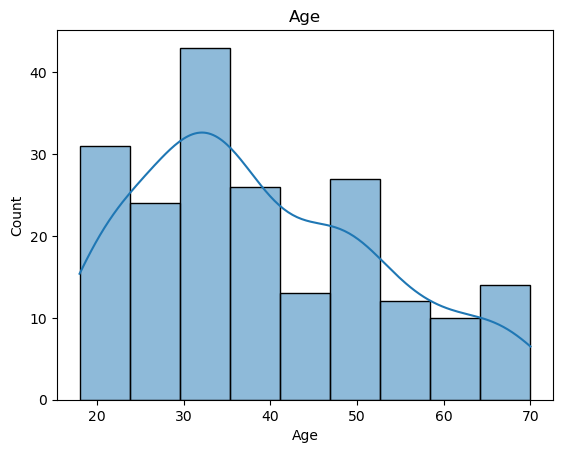

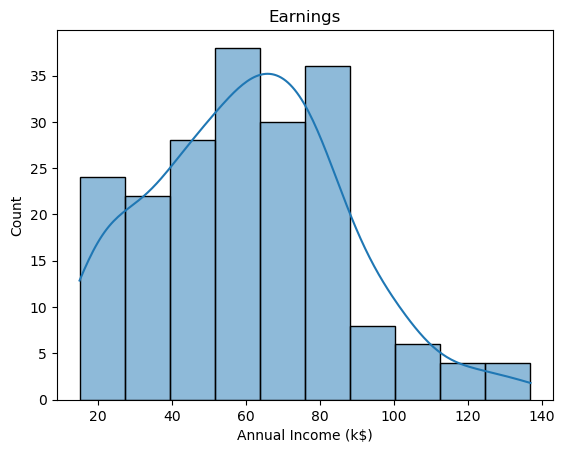

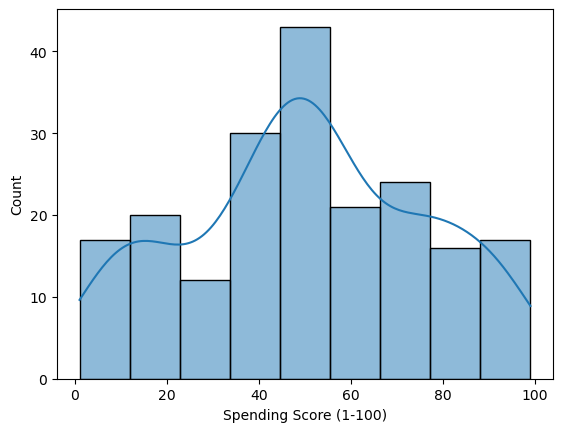

In [4]:
# histogram of variables
p = sns.histplot(customers['Age'], kde=True)
p.set_title('Age')
plt.show()
p = sns.histplot(customers['Annual Income (k$)'], kde=True)
p.set_title('Earnings')
plt.show()
sns.histplot(customers['Spending Score (1-100)'], kde=True)
p = p.set_title('Spending')
plt.show()

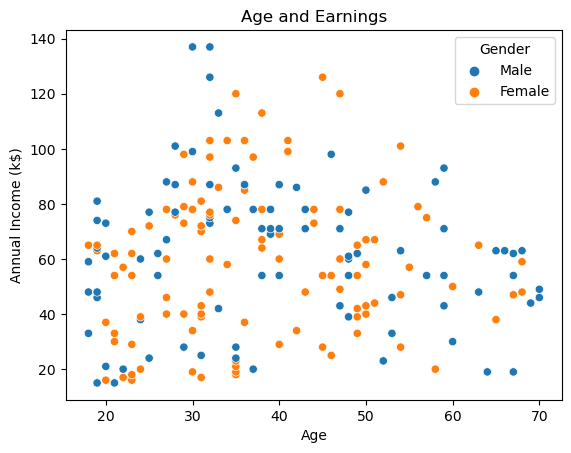

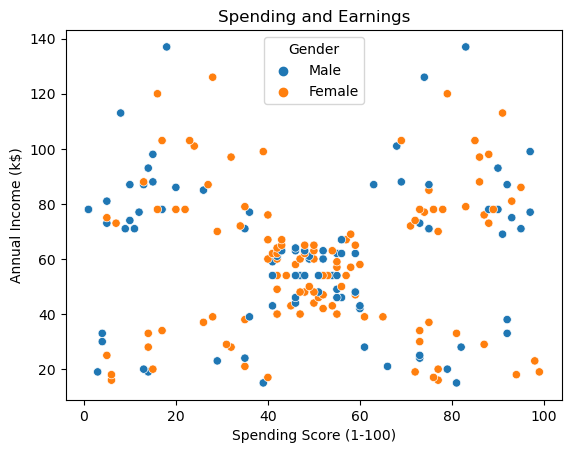

In [5]:
# scatter plots
p = sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Gender', data=customers)
p.set_title('Age and Earnings')
plt.show()

p = sns.scatterplot(x='Spending Score (1-100)', y='Annual Income (k$)', hue='Gender', data=customers)
p.set_title('Spending and Earnings')
plt.show()

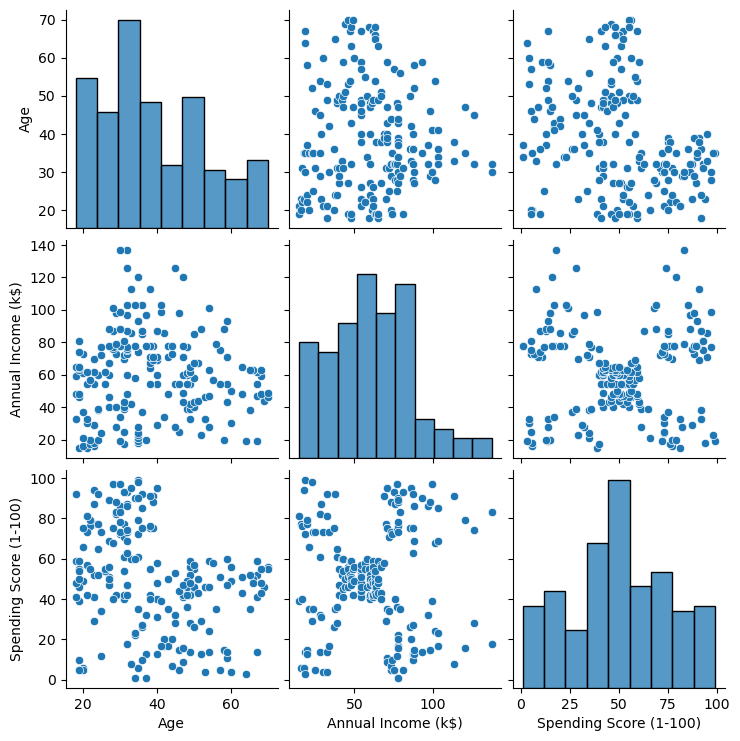

In [6]:
sns.pairplot(customers[['Age',
                        'Annual Income (k$)',
                        'Spending Score (1-100)', 
                       'Gender'
                       ]])

# Pre-Process Data

In [7]:
# encode gender
customers['Gend'] = np.where(customers['Gender'] == 'Male', 1, 0)
customers

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gend
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,1


In [8]:
# scale data
cust_rel = customers [[
    'Age',
    'Gend',
    'Annual Income (k$)',
    'Spending Score (1-100)'
]]

# Extracting them from the dataframe
x = cust_rel.values

# Scaling down the features
scaler = StandardScaler()
x_scaled =  scaler.fit_transform(x)

cust_scaled = pd.DataFrame(x_scaled)
cust_scaled.columns = ['Age', 'Gender', 'Annual_Income', 'Spending_Score']
cust_scaled

,Age,Gender,Annual_Income,Spending_Score
0,-1.424569,1.128152,-1.738999,-0.434801
1,-1.281035,1.128152,-1.738999,1.195704
2,-1.352802,-0.886405,-1.700830,-1.715913
3,-1.137502,-0.886405,-1.700830,1.040418
4,-0.563369,-0.886405,-1.662660,-0.395980
...,...,...,...,...
195,-0.276302,-0.886405,2.268791,1.118061
196,0.441365,-0.886405,2.497807,-0.861839
197,-0.491602,1.128152,2.497807,0.923953
198,-0.491602,1.128152,2.917671,-1.250054


# Build Hierarchical Clustering Model

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [45.0, 45.0, 55.0, 55.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [50.0, 50.0, 72.5, 72.5],
  [95.0, 95.0, 105.0, 105.0],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [100.0, 100.0, 122.5, 122.5],
  [145.0, 145.0, 155.0, 155.0],
  [175.0, 175.0, 185.0, 185.0],
  [195.0, 195.0, 205.0, 205.0],
  [180.0, 180.0, 200.0, 200.0],
  [165.0, 165.0, 190.0, 190.0],
  [150.0, 150.0, 177.5, 177.5],
  [111.25, 111.25, 163.75, 163.75],
  [61.25, 61.25, 137.5, 137.5],
  [13.75, 13.75, 99.375, 99.375],
  [215.0, 215.0, 225.0, 225.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [272.5, 272.5, 302.5, 302.5],
  [242.5, 242.5, 287.5, 287.5],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.0, 350.0, 350.0],
  [325.0, 325.0, 342.5, 

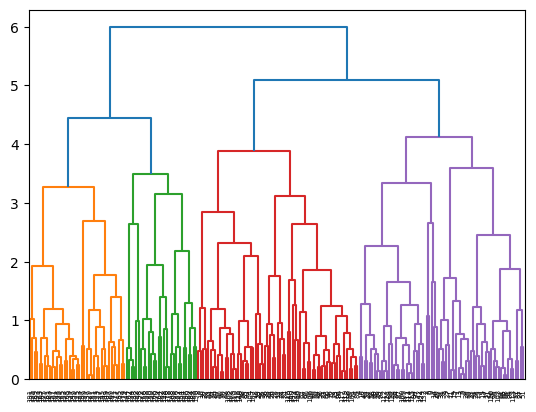

In [9]:
model = linkage(cust_scaled, method='complete', metric='euclidean')
dendrogram(model)

In [10]:
mod = AgglomerativeClustering(n_clusters = 5, affinity  = 'euclidean', linkage ='complete' )
preds = mod.fit_predict(cust_scaled)

cust_scaled['cluster'] = preds

C:\Users\smark\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


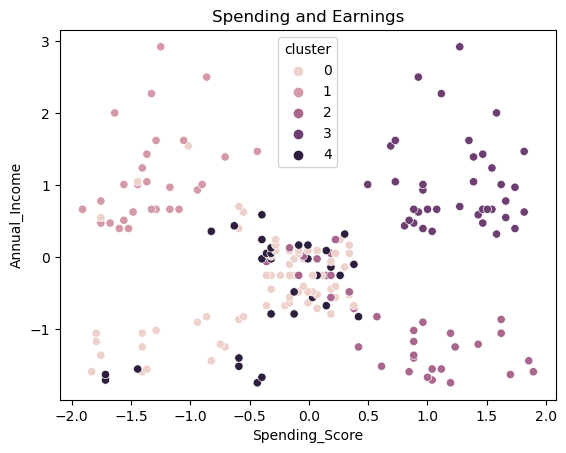

In [11]:
p = sns.scatterplot(x='Spending_Score', y='Annual_Income', hue='cluster', data=cust_scaled)
p.set_title('Spending and Earnings')
plt.show()

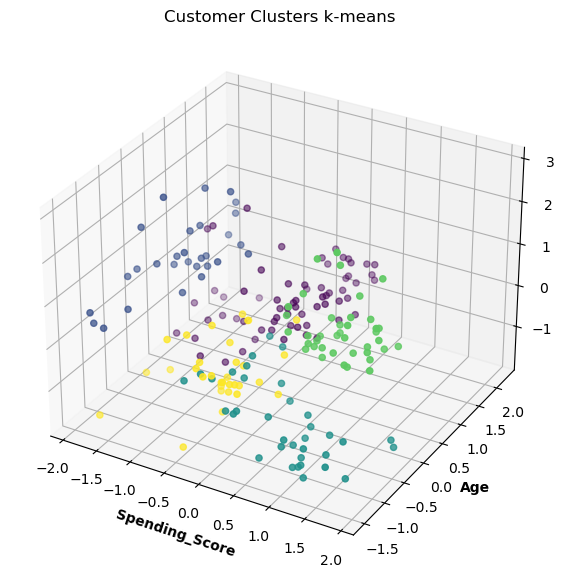

In [12]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(cust_scaled['Spending_Score'], cust_scaled['Age'], cust_scaled['Annual_Income'], c = preds)
ax.set_xlabel('Spending_Score', fontweight ='bold')
ax.set_ylabel('Age', fontweight ='bold')
ax.set_zlabel('Annual_Income', fontweight ='bold')
plt.title("Customer Clusters k-means")
 
# show plot
plt.show()

In [13]:
silhouette_score(cust_scaled[['Age', 'Gender', 'Spending_Score', 'Annual_Income']], labels=cust_scaled['cluster'])

0.243309230918067

# Build K-Means Model

In [14]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
X = cust_scaled[['Age', 'Gender', 'Spending_Score', 'Annual_Income']]

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k, init='k-means++', n_init='auto').fit(X)
    kmeanModel.fit(X)
    
    inertias.append(kmeanModel.inertia_)

C:\Users\smark\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\smark\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\smark\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\smark\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

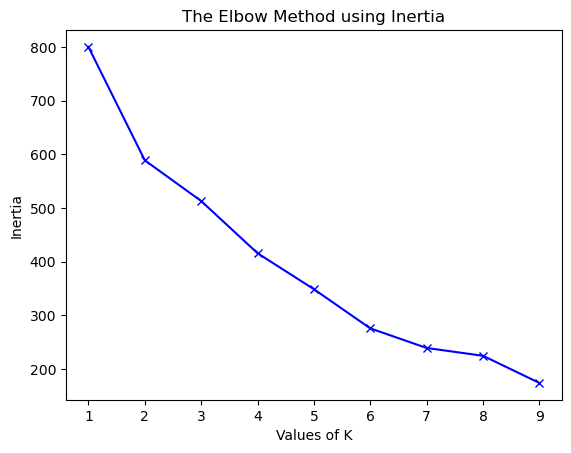

In [15]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [36]:
k_mod = KMeans(n_clusters=5, init='k-means++', n_init='auto', random_state = 0).fit(X)
preds = KMeans(n_clusters=5, init='k-means++', n_init='auto').fit_predict(X)

C:\Users\smark\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\smark\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


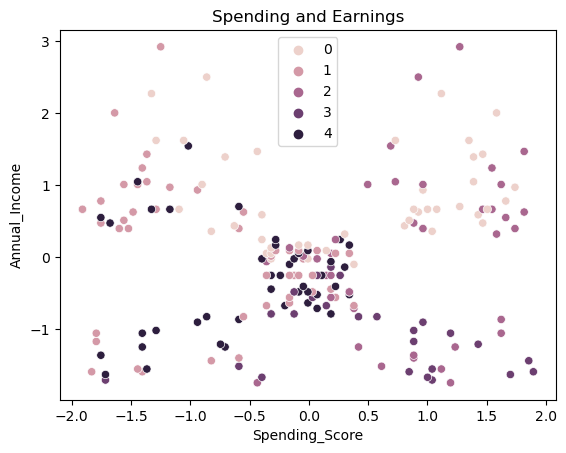

In [37]:
p = sns.scatterplot(x='Spending_Score', y='Annual_Income', hue=preds, data=cust_scaled)
p.set_title('Spending and Earnings')
#plt.scatter(k_mod.cluster_centers_[:, 0], k_mod.cluster_centers_[:, 1], s = 50, c = 'black', label = 'Centroid')
plt.show()

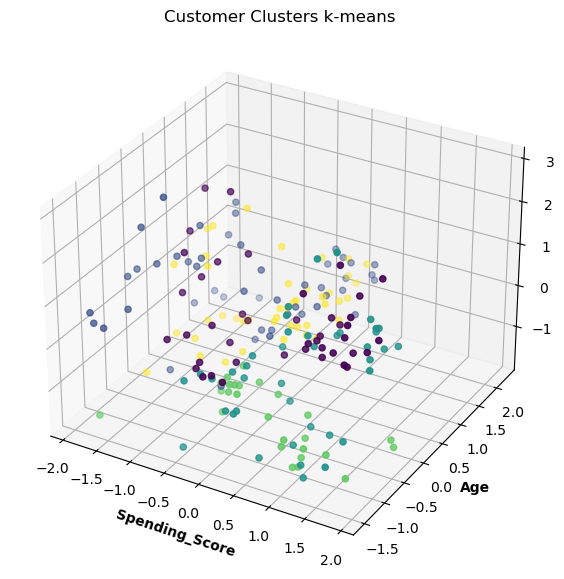

In [38]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(cust_scaled['Spending_Score'], cust_scaled['Age'], cust_scaled['Annual_Income'], c = preds)
ax.set_xlabel('Spending_Score', fontweight ='bold')
ax.set_ylabel('Age', fontweight ='bold')
ax.set_zlabel('Annual_Income', fontweight ='bold')
plt.title("Customer Clusters k-means")
 
# show plot
plt.show()

In [42]:
silhouette_score(cust_scaled[['Age', 'Gender', 'Spending_Score', 'Annual_Income']], labels=preds)

0.2934915916900695

# Evaluate Clusters

In [43]:
cust_out = cust_rel.copy(0)
cust_out['cluster'] = preds
cust_out.select_dtypes(include=[np.number]).groupby('cluster').median()

,Age,Gend,Annual Income (k$),Spending Score (1-100)
cluster,,,,
0,32.0,0.0,78.0,60.0
1,48.5,1.0,62.5,32.0
2,28.0,1.0,63.0,73.0
3,25.5,0.0,33.5,63.0
4,50.0,0.0,50.0,43.0


# Conclusion

I tested both hierarchical and k means clusteringm models and found that the best model was  a k means model with four clusters. I decided this because it was the model with the best silhouette score of .298. When I looked into the clusters I found that the main distinctions were in Gender and spending score. There seems to be a cluster of men who are large spenders, and a group of women who are large spenders, in addition there is a group of each gender of low spending scores as well. This could be useful to the mall marketing team to show that both men and women can be high spenders, but their spending score is a much more important factor of a customer. 